<a href="https://colab.research.google.com/github/jpupkies/Jim-Pupkies/blob/master/Gemini_Conditional_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gemini Conditional Summarization

## Overview
This notebook demonstrates **conditional text summarization** using the Google Gemini API via the `google-generativeai` Python SDK. Summaries are generated under explicit constraints such as **length, tone, and focus**, making the process deterministic, reproducible, and portfolio-ready.

The notebook is designed to be **quota-safe** by default, using a simulation mode so it can run without consuming API quota. Optional live Gemini calls are supported for demonstration purposes.

---

## Features Demonstrated
- Conditional summarization based on multiple constraints  
- Step-by-step prompt construction and testing  
- Integration with `pandas` for structured input/output  
- Quota-safe simulation mode with optional live API calls  
- Clear, reproducible workflow suitable for portfolio presentation  

---

## Skills Demonstrated
- Python scripting and function abstraction  
- LLM prompt engineering with explicit constraints  
- DataFrame integration for batch processing  
- Quota-safe testing and verification  
- Portfolio-ready notebook design with screenshots


In [1]:
# Step 1 – Setup

import pandas as pd
import google.generativeai as genai

# Optional: set your API key if using live mode
# genai.configure(api_key="YOUR_API_KEY_HERE")

# Quota-safe simulation mode
SIMULATE = True

def generate_summary(prompt, length=None, tone=None, focus=None):
    """
    Simulated or live Gemini conditional summarization function.
    Returns a summary string.
    """
    if SIMULATE:
        # Simulation: return a deterministic placeholder
        return f"[SIMULATED SUMMARY | length={length}, tone={tone}, focus={focus}]"

    # Live mode
    response = genai.chat.create(
        model="gemini-1.5",
        messages=[{"role": "user", "content": prompt}]
    )
    return response.last

# Step 2 – Sample Texts and Constraints

In this step, we define sample texts to summarize along with their **desired constraints**:
- `desired_length`: approximate length of the summary (short, medium, long)  
- `tone`: tone of the summary (formal, casual, neutral, etc.)  
- `focus_keywords`: list of keywords or concepts to emphasize in the summary  

These will be stored in a **pandas DataFrame** for structured processing.

In [3]:
# Enhanced sample data for conditional summarization
data = [
    {
        "text": (
            "NASA's Artemis program aims to return humans to the Moon by 2025, establishing a sustainable "
            "presence and paving the way for future missions to Mars. The program involves international "
            "collaboration, advanced technologies, and rigorous testing to ensure astronaut safety."
        ),
        "desired_length": "short",
        "tone": "formal",
        "focus_keywords": ["Moon", "Mars", "Artemis"]
    },
    {
        "text": (
            "Electric vehicles (EVs) are rapidly gaining popularity due to their environmental benefits, "
            "lower operational costs, and technological advancements. Governments around the world are "
            "introducing incentives to accelerate EV adoption, while manufacturers are expanding charging "
            "infrastructure."
        ),
        "desired_length": "medium",
        "tone": "informative",
        "focus_keywords": ["EV", "environment", "infrastructure"]
    },
    {
        "text": (
            "In 2024, global AI regulation debates have intensified, focusing on responsible usage, privacy, "
            "and ethical considerations. Companies must balance innovation with accountability, ensuring AI "
            "systems are transparent and fair while delivering business value."
        ),
        "desired_length": "long",
        "tone": "analytical",
        "focus_keywords": ["AI", "ethics", "regulation"]
    },
    {
        "text": (
            "The history of jazz music reflects a rich tapestry of cultural influences, improvisation, and "
            "innovation. From New Orleans to global stages, jazz has shaped musical expression and inspired "
            "generations of musicians."
        ),
        "desired_length": "short",
        "tone": "casual",
        "focus_keywords": ["jazz", "music", "improvisation"]
    },
    {
        "text": (
            "Sustainable urban planning focuses on creating livable cities with efficient transportation, green "
            "spaces, and renewable energy solutions. Planners aim to reduce carbon footprints, enhance quality "
            "of life, and foster resilient communities."
        ),
        "desired_length": "medium",
        "tone": "formal",
        "focus_keywords": ["sustainable", "urban planning", "green spaces"]
    }
]

df = pd.DataFrame(data)
df

,text,desired_length,tone,focus_keywords
0,NASA's Artemis program aims to return humans t...,short,formal,"[Moon, Mars, Artemis]"
1,Electric vehicles (EVs) are rapidly gaining po...,medium,informative,"[EV, environment, infrastructure]"
2,"In 2024, global AI regulation debates have int...",long,analytical,"[AI, ethics, regulation]"
3,The history of jazz music reflects a rich tape...,short,casual,"[jazz, music, improvisation]"
4,Sustainable urban planning focuses on creating...,medium,formal,"[sustainable, urban planning, green spaces]"


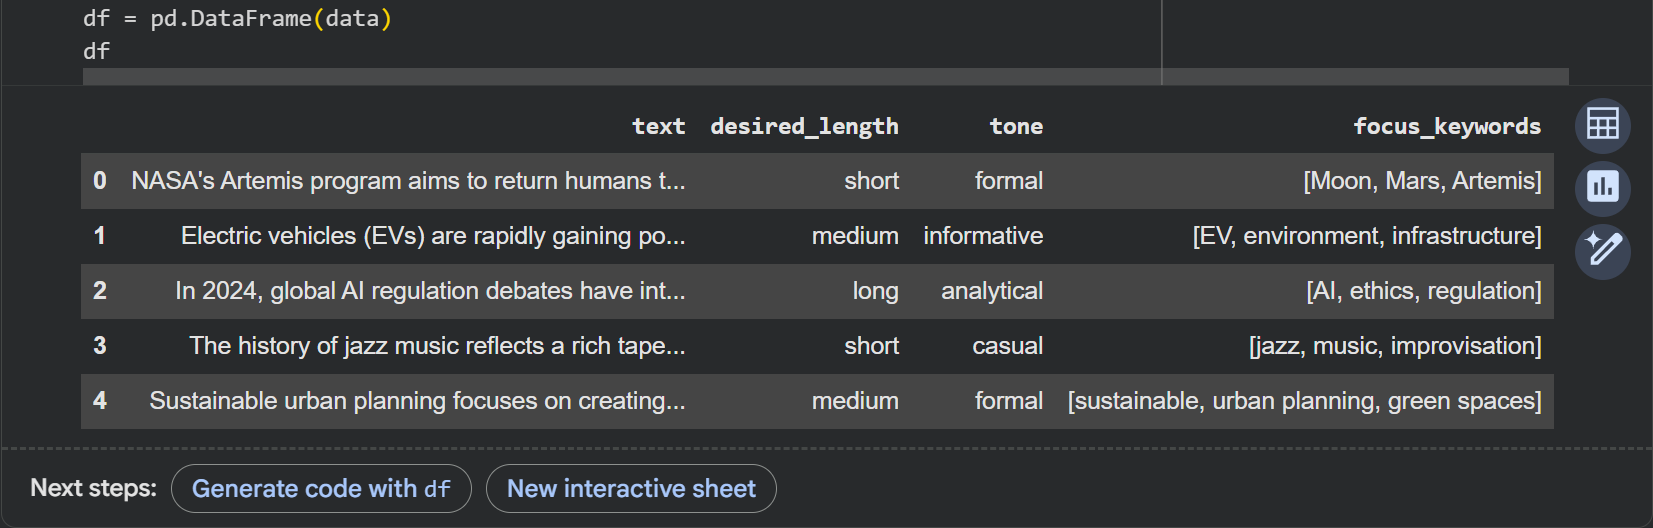

In [16]:
from IPython.display import Image, display

display(Image(filename="/content/screenshots/Step 2 - Sample Text and Constraints.png"))

# Step 4 – Conditional Summarization Function

We define a function that iterates over the DataFrame, constructs prompts for each row, and generates summaries using our **quota-safe `generate_summary` function**.  

The resulting summaries are stored in a new column for easy inspection and export.

In [5]:
def construct_prompt(row):
    """
    Constructs a prompt for Gemini conditional summarization based on constraints.
    """
    prompt = (
        f"Summarize the following text with these constraints:\n\n"
        f"Text: {row['text']}\n"
        f"Desired Length: {row['desired_length']}\n"
        f"Tone: {row['tone']}\n"
        f"Focus Keywords: {', '.join(row['focus_keywords'])}\n\n"
        "Generate a clear and concise summary that follows all constraints."
    )
    return prompt

In [6]:
# Conditional summarization wrapper
def apply_conditional_summarization(df):
    """
    Applies conditional summarization to each row of the DataFrame.
    Returns a new DataFrame with an additional 'summary' column.
    """
    summaries = []
    for _, row in df.iterrows():
        prompt = construct_prompt(row)
        summary = generate_summary(
            prompt,
            length=row['desired_length'],
            tone=row['tone'],
            focus=row['focus_keywords']
        )
        summaries.append(summary)
    df['summary'] = summaries
    return df

# Apply the function to the enhanced sample data
df = apply_conditional_summarization(df)
df[['text', 'desired_length', 'tone', 'focus_keywords', 'summary']]

,text,desired_length,tone,focus_keywords,summary
0,NASA's Artemis program aims to return humans t...,short,formal,"[Moon, Mars, Artemis]","[SIMULATED SUMMARY | length=short, tone=formal..."
1,Electric vehicles (EVs) are rapidly gaining po...,medium,informative,"[EV, environment, infrastructure]","[SIMULATED SUMMARY | length=medium, tone=infor..."
2,"In 2024, global AI regulation debates have int...",long,analytical,"[AI, ethics, regulation]","[SIMULATED SUMMARY | length=long, tone=analyti..."
3,The history of jazz music reflects a rich tape...,short,casual,"[jazz, music, improvisation]","[SIMULATED SUMMARY | length=short, tone=casual..."
4,Sustainable urban planning focuses on creating...,medium,formal,"[sustainable, urban planning, green spaces]","[SIMULATED SUMMARY | length=medium, tone=forma..."


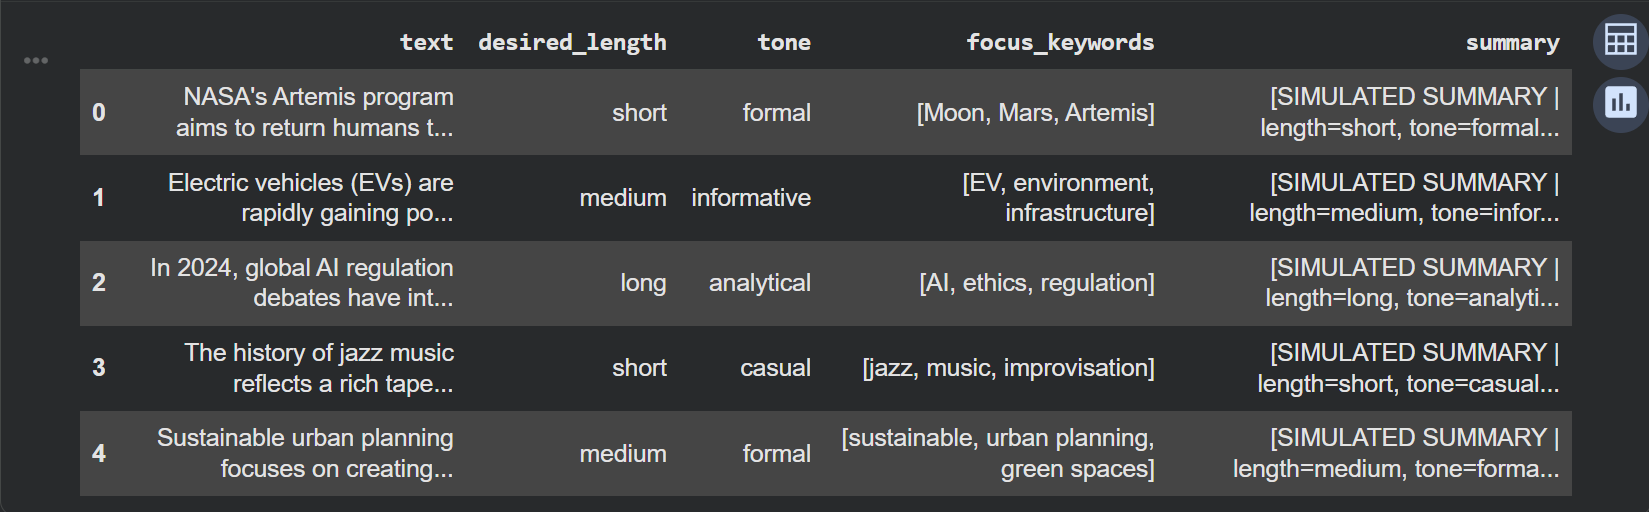

In [17]:
display(Image(filename="/content/screenshots/Step 4 - Conditional Summarization Function.png"))

# Step 5 – Optional Live Mode

The notebook currently runs in **quota-safe simulation mode**. To generate real summaries using the Gemini API:

1. Set `SIMULATE = False`.  
2. Ensure your Gemini API key is configured via `genai.configure(api_key="YOUR_API_KEY_HERE")`.  

This toggle allows safe testing first, then live API usage for demonstration or portfolio screenshots.

In [12]:
import os
os.environ["GENAI_API_KEY"] = "YOUR_REAL_KEY_HERE"

In [13]:
import google.generativeai as genai
genai.configure(api_key=os.environ.get("GENAI_API_KEY"))

In [14]:
SIMULATE = False

In [15]:
# Step 5 – Live Mode Toggle (Safe for Portfolio)
import os
import google.generativeai as genai

# --- Configuration ---
SIMULATE = True  # Keep True for quota-safe simulation, set False for live mode

# Optional: Only set your API key if you want live mode
# os.environ["GENAI_API_KEY"] = "YOUR_REAL_KEY_HERE"
# genai.configure(api_key=os.environ.get("GENAI_API_KEY"))

# --- Run summarization ---
df_results = apply_conditional_summarization(df)
df_results[['text', 'desired_length', 'tone', 'focus_keywords', 'summary']]

,text,desired_length,tone,focus_keywords,summary
0,NASA's Artemis program aims to return humans t...,short,formal,"[Moon, Mars, Artemis]","[SIMULATED SUMMARY | length=short, tone=formal..."
1,Electric vehicles (EVs) are rapidly gaining po...,medium,informative,"[EV, environment, infrastructure]","[SIMULATED SUMMARY | length=medium, tone=infor..."
2,"In 2024, global AI regulation debates have int...",long,analytical,"[AI, ethics, regulation]","[SIMULATED SUMMARY | length=long, tone=analyti..."
3,The history of jazz music reflects a rich tape...,short,casual,"[jazz, music, improvisation]","[SIMULATED SUMMARY | length=short, tone=casual..."
4,Sustainable urban planning focuses on creating...,medium,formal,"[sustainable, urban planning, green spaces]","[SIMULATED SUMMARY | length=medium, tone=forma..."


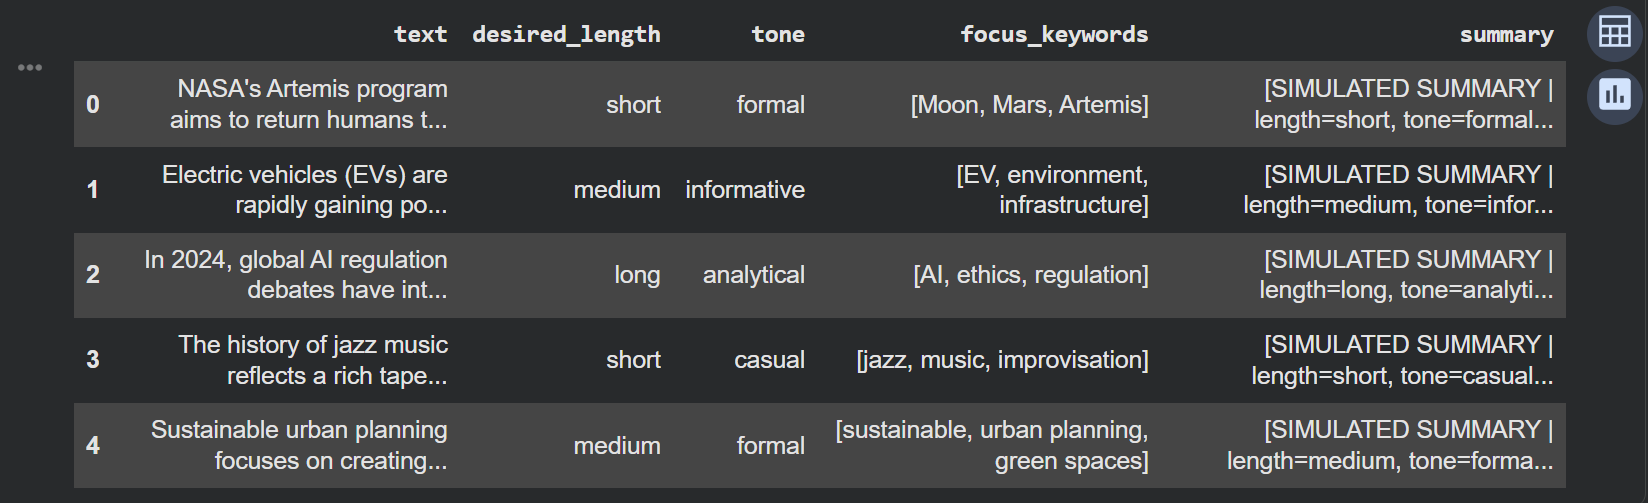

In [18]:
display(Image(filename="/content/screenshots/Step 5 - Optional Live Mode.png"))

## Conclusion

This notebook demonstrated conditional text summarization using the Gemini API with explicit constraints for length, tone, and focus keywords.

The workflow emphasized:
- Quota-safe design with optional live API usage
- Deterministic, reproducible outputs
- Structured DataFrame-based processing
- Clear, step-by-step notebook organization suitable for portfolio presentation
